<a href="https://colab.research.google.com/github/BernardoBremer/Inteligencia-Computacional-Cetys-/blob/main/EDA_HeartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Dataset - EDA and Preprocessing Pipelines

## Introduction

In this notebook, we will perform exploratory data analysis (EDA) on the Heart Attack dataset, followed by building preprocessing pipelines for numerical and categorical features.

The dataset contains medical information about patients, including whether they had a heart attack or not. The objective is to predict heart attack risk based on the available features, making this a **_binary classification_** problem.

Let's start by importing the necessary libraries and loading the dataset as a pandas DataFrame.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [4]:
data = pd.read_csv('heart.csv.xls')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration

Let's examine the structure and basic statistics of the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In total we have 14 columns:
- age: Age of the patient
- sex: Gender (1 = male, 0 = female)
- cp: Chest pain type (0-3)
- trestbps: Resting blood pressure (mm Hg)
- chol: Serum cholesterol (mg/dl)
- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- restecg: Resting electrocardiographic results (0-2)
- thalach: Maximum heart rate achieved
- exang: Exercise induced angina (1 = yes, 0 = no)
- oldpeak: ST depression induced by exercise
- slope: Slope of the peak exercise ST segment (0-2)
- ca: Number of major vessels colored by fluoroscopy (0-3)
- thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
- target: Heart attack risk (1 = yes, 0 = no)

## Visualization of Numerical Features

Let's visualize the distributions of the numerical features in the dataset. We will use the `seaborn` library to create histograms with kernel density estimates (KDE) for each numerical column.

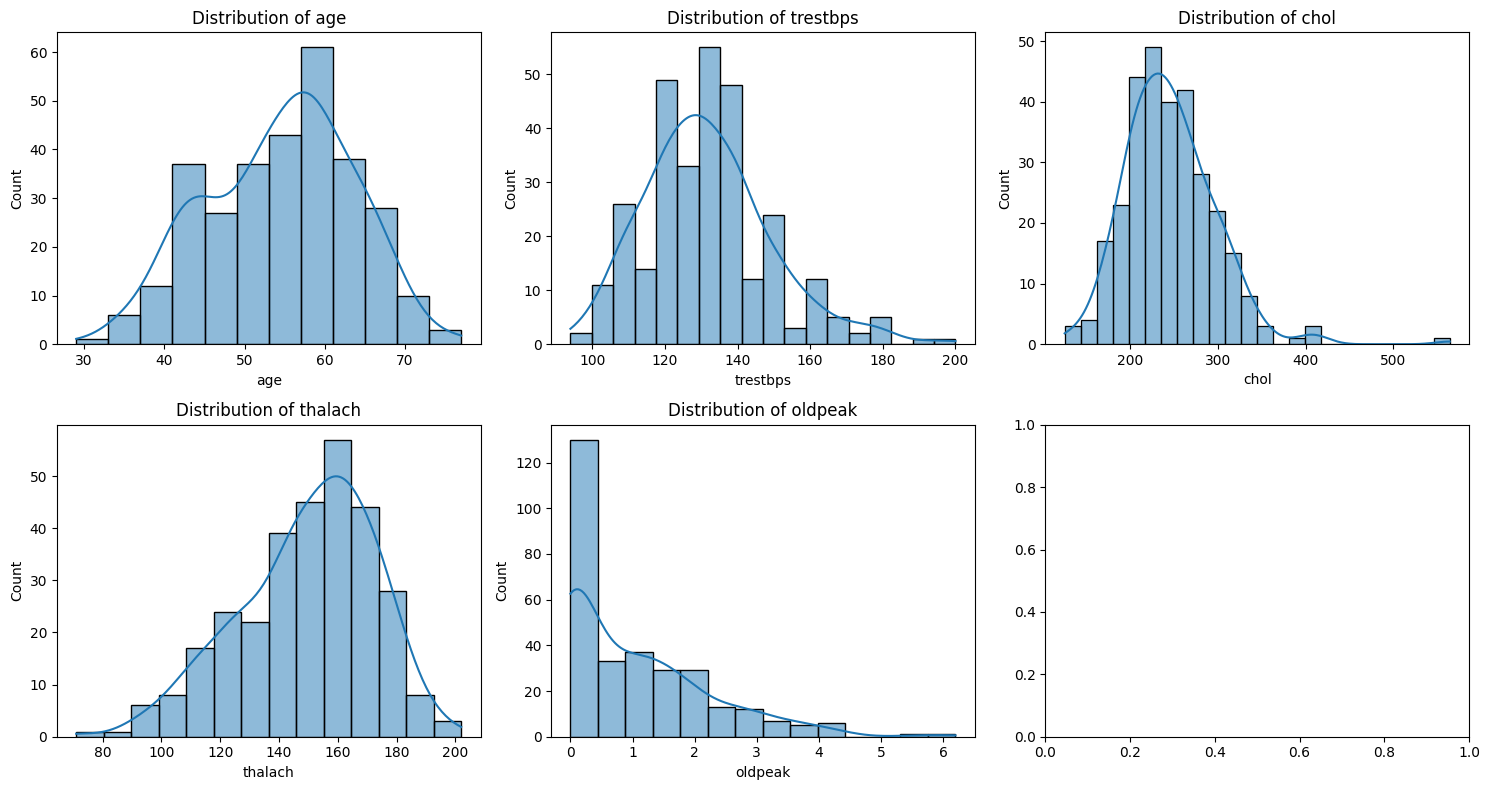

In [7]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

## Visualization of Categorical Features

Now let's visualize the categorical features using count plots.

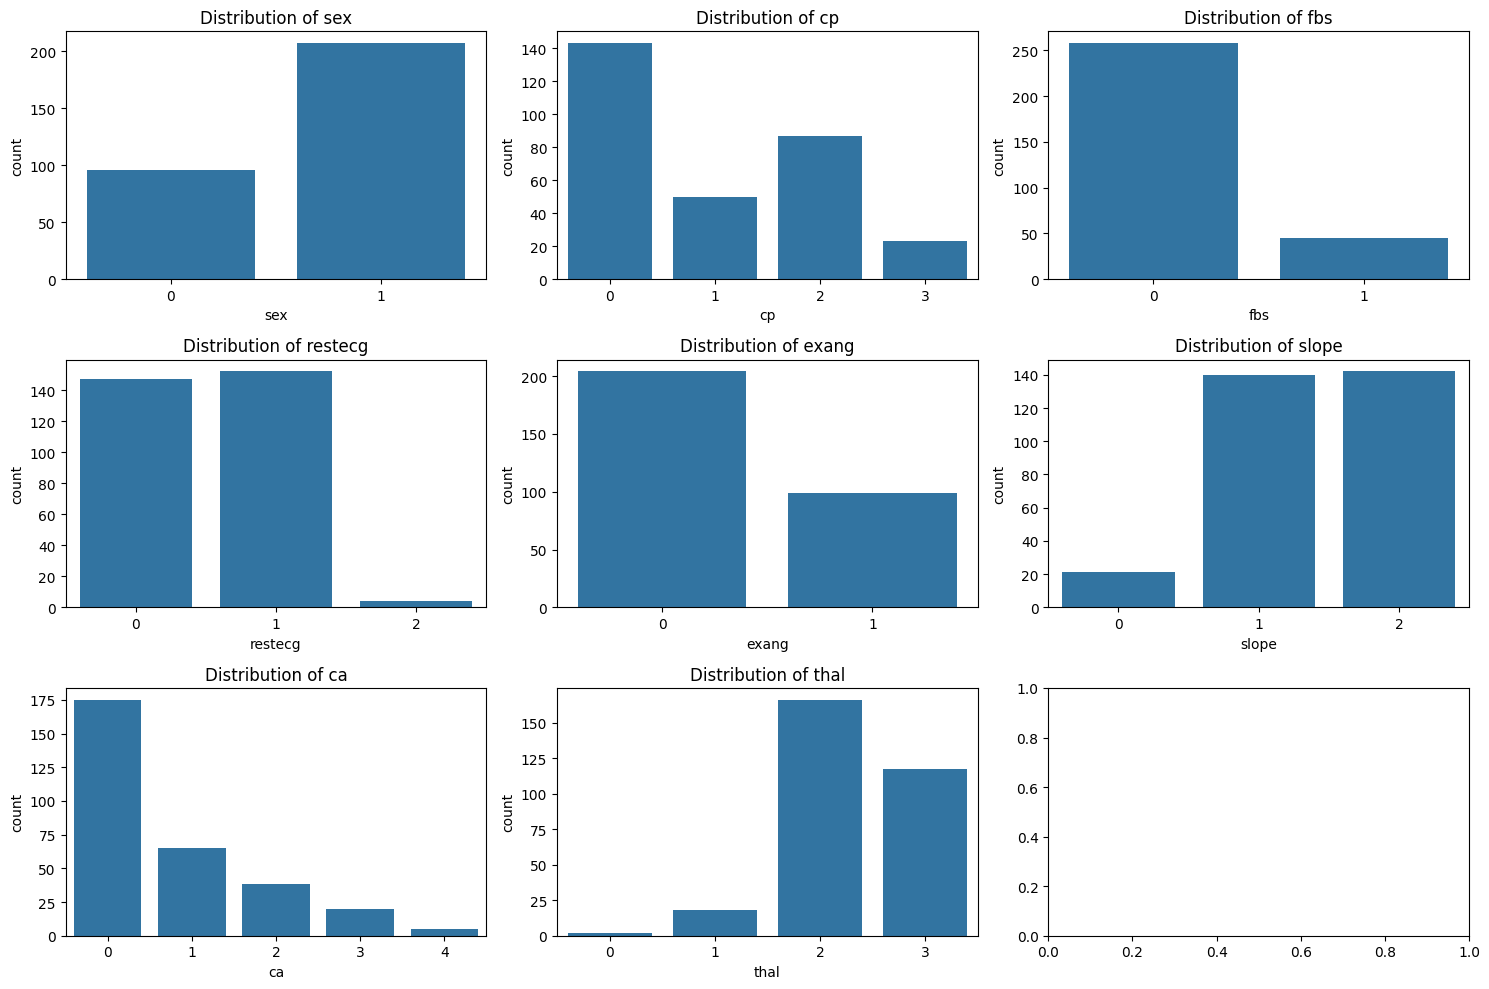

In [8]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

## Target Variable Distribution

Let's examine the distribution of our target variable.

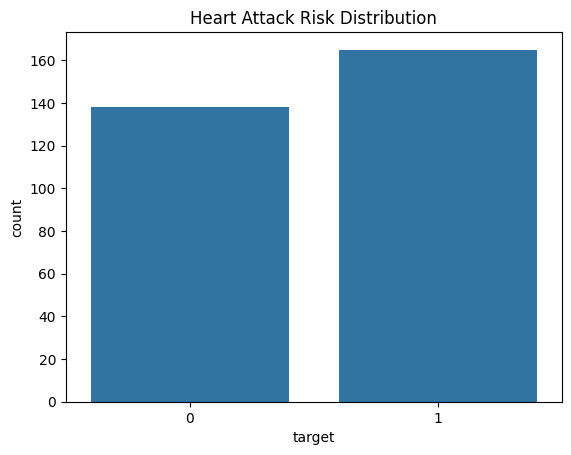

target
1    165
0    138
Name: count, dtype: int64

Percentage with heart attack risk: 54.46%


In [9]:
sns.countplot(data=data, x='target')
plt.title('Heart Attack Risk Distribution')
plt.show()

print(data['target'].value_counts())
print(f"\nPercentage with heart attack risk: {data['target'].mean()*100:.2f}%")

## Missing Values

Let's check for missing values in the dataset.

In [10]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Correlation Analysis

Let's examine the correlations between features and the target variable.

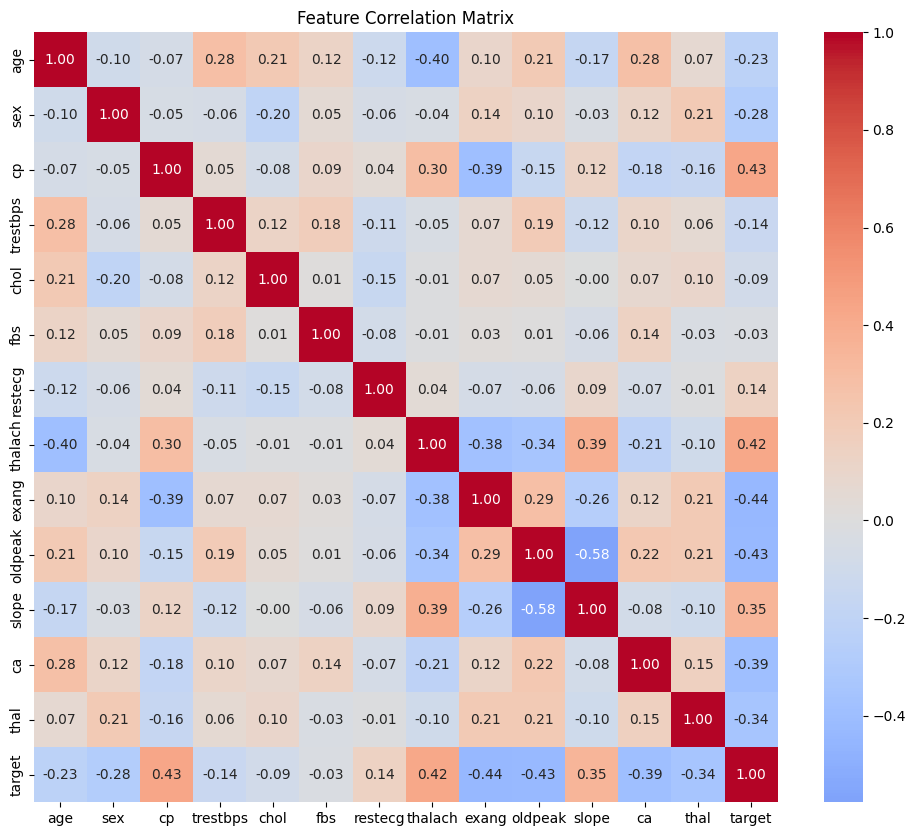

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## Preprocessing Pipelines

Now we'll create preprocessing pipelines for numerical and categorical features.

In [12]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create preprocessing pipelines
numerical_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

## Model Training

Let's train a logistic regression model using our preprocessing pipeline.

In [14]:
# Create full pipeline with model
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000, random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Evaluate
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")

Training accuracy: 0.8760
Test accuracy: 0.8852


## Conclusion

In this notebook, we performed exploratory data analysis on the Heart Attack dataset and built preprocessing pipelines for both numerical and categorical features. We then trained a logistic regression model to predict heart attack risk.